In [3]:
# HOMEWORK 1
# Direct Methods for the solution of Linear Systems

import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt 

In [3]:
# Computes the right-hand side of the linear system b = A xtrue

def Compute_bAx(A, x_true):
    b = A @ x_true
    return b

In [4]:
# Computes the condition number in 2-norm of the matrix A. 
# It is ill-conditioned? What if we use the ∞-norm instead of the 2-norm?

def Cond_2_inf(A):
    k2= np.linalg.cond(A, 2)
    kinf = np.linalg.cond(A, np.inf)
    return k2, kinf

In [5]:
# Solves the linear system Ax = b with the function np.linalg.solve()

def Solve_Axb(A, b):
    x = np.linalg.solve(A, b) 
    return x

In [6]:
# Computes the relative error between the solution computed before and the true solution xtrue 

def R_Error(x, x_true):
    R = np.linalg.norm(x - x_true, 2) / np.linalg.norm(x_true, 2)
    return R

In [7]:
#Plot a graph (using matplotlib.pyplot) with the relative errors as a function of n 
# and (in a new window) the condition number in 2-norm K2(A) and in ∞-norm, as a function of n.

def PlotGraph(n, R, k2, kinf):
    # First graph - Relative Error at n changings
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1) 
    plt.plot(n, R, marker='o', linestyle='-', color='b', label='relative error')
    plt.xlabel('n')
    plt.ylabel('Relative Error')
    plt.title('Relative Errors of a random matrix problem')
    plt.legend()
    plt.grid(True)
    
    # Second graph - Condition number with 2-norm and infinite norm
    plt.subplot(1, 2, 2) 
    plt.plot(n, k2, marker='o', linestyle='-', color='r', label='condition number with norm 2')
    plt.plot(n, kinf, marker='s', linestyle='--', color='g', label='condition number with norm inf')
    plt.xlabel('n')
    plt.ylabel('Condition number')
    plt.title('Condition number with 2-norm and inf-norm')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

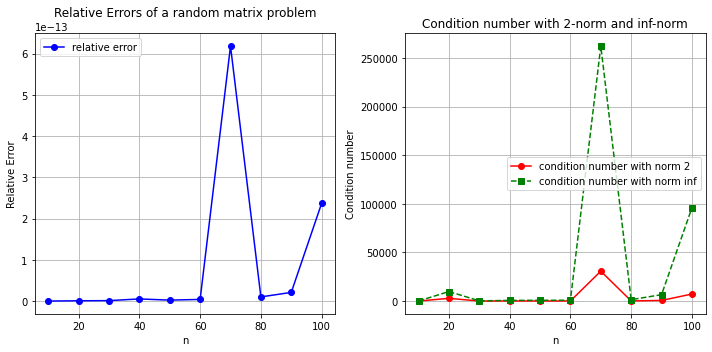

In [14]:
# Testing with random matrix

nr = np.arange(10, 110, 10)  # n = {10, 20, 30, . . . , 100}
R_rand = []
k2_rand = []
kinf_rand = []

for i in nr:
    xr_true = np.ones((i,))
    A_rand = np.random.randn(i,i)
    b_rand = Compute_bAx(A_rand, xr_true) 
    k2, kinf = Cond_2_inf(A_rand)
    k2_rand.append(k2)
    kinf_rand.append(kinf)
    xr = Solve_Axb(A_rand, b_rand)
    R_rand.append(R_Error(xr, xr_true))

PlotGraph(nr, R_rand, k2_rand, kinf_rand)

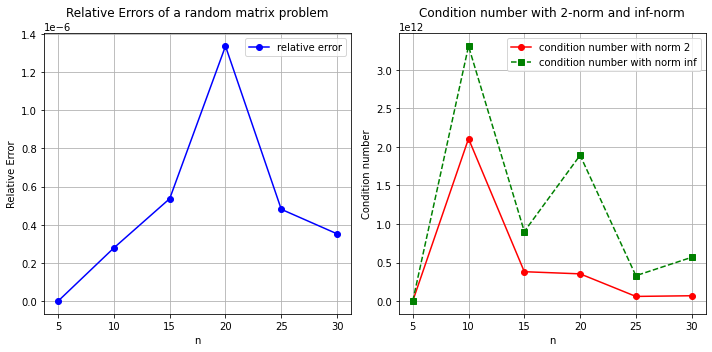

In [9]:
# Testing with Vandermonde matrix

nv = np.arange(5, 35, 5) # n = {10, 15, . . . , 30}
R_vand = []
k2_vand = []
kinf_vand = []

for i in nv:
    xv_true = np.ones((i,)) 
    x = np.arange(1, i+1, 1) # x = {1, 2, 3, . . . , n}
    A_vand = np.vander(x, N=i)
    b_vand = Compute_bAx(A_vand, xv_true) 
    k2, kinf = Cond_2_inf(A_vand)
    k2_vand.append(k2)
    kinf_vand.append(kinf)
    xv = Solve_Axb(A_vand, b_vand)
    R_vand.append(R_Error(xv, xv_true))

PlotGraph(nv, R_vand, k2_vand, kinf_vand)

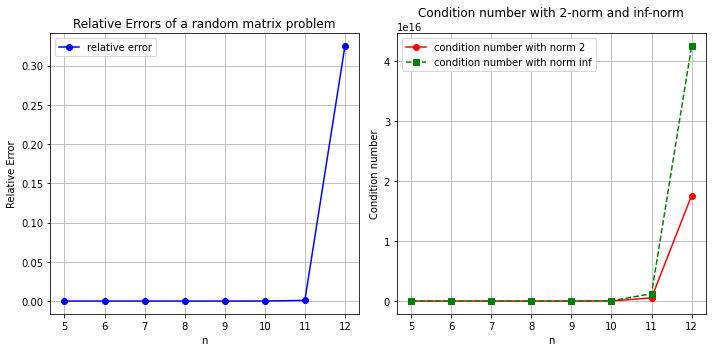

In [10]:
# Testing with Hilbert matrix

nh = np.arange(5, 13, 1) # n = {5, 6, ..., 12}
R_hilb = []
k2_hilb = []
kinf_hilb = []

for i in nh:
    xh_true = np.ones((i,))
    A_hilb = scipy.linalg.hilbert(i)
    b_hilb= Compute_bAx(A_hilb, xh_true) 
    k2, kinf = Cond_2_inf(A_hilb)
    k2_hilb.append(k2)
    kinf_hilb.append(kinf)
    xh = Solve_Axb(A_hilb, b_hilb)
    R_hilb.append(R_Error(xh, xh_true))

PlotGraph(nh, R_hilb, k2_hilb, kinf_hilb)

In [6]:
#Floating Point Arithmetic

import math

# Compute e, which is defined as the smallest floating point number such that it holds: fl(1 + e) > 1
def f():
  e=1
  while( float(1+e) > 1):
    res=e
    e=e/2
  return res

print(f())


# Choose different values for n, compute an and compare it to the real value of the Euler costant. 
# What happens if you choose a large value of n? 
def function(n):
 return (1+1/n)**n

for i in [1, 10, 1000, 1000000, 1000000000]:
  n=function(i)
  print(f"i: {i}")
  print(f"N: {n}")
  print(f"N-e: {n-math.e}\n")

# Compute the rank of A and B and their eigenvalues. Are A and B full-rank matrices? 
# Can you infer some relationship between the values of the eigenvalues and the full-rank condition?
A=np.array(([4,2],[1,3]))
B=np.array(([4,2],[2,1]))

rank_A=np.linalg.matrix_rank(A)
rank_B=np.linalg.matrix_rank(B)

eig_A=np.linalg.eigvals(A)
eig_B=np.linalg.eigvals(B)

print(f"Rango A: {rank_A}")
print(f"Rango B: {rank_B}")

if(rank_A == 2 and rank_B == 2):
  print("Sono entrambe rango massimo")
elif(rank_A == 2):
  print("A è di rango massimo")
elif(rank_B == 2):
  print("B è di rango massimo")
else:
  print("Nessuna delle due è di grado massimo")

print(f"Autovalori di A: {eig_A}")
print(f"Autovalori di B: {eig_B}")

#A has all the eigenvalues greater than 0 so it has maximum rank
#B has one eigenvalue equal to 0 so it hasn't maximum rank

# Other matrices
n=2
A=np.random.rand(n,n)
eig_A=np.linalg.eigvals(A)
rank_A=np.linalg.matrix_rank(A)
print()
print(f"Autovalori: {eig_A}")
print(f"Rango: {rank_A}")

2.220446049250313e-16
i: 1
N: 2.0
N-e: -0.7182818284590451

i: 10
N: 2.5937424601000023
N-e: -0.12453936835904278

i: 1000
N: 2.7169239322355936
N-e: -0.0013578962234515046

i: 1000000
N: 2.7182804690957534
N-e: -1.359363291708604e-06

i: 1000000000
N: 2.7182820520115603
N-e: 2.2355251516614771e-07

Rango A: 2
Rango B: 1
A è di rango massimo
Autovalori di A: [5. 2.]
Autovalori di B: [5. 0.]

Autovalori: [1.02344707 0.07995801]
Rango: 2
